In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np


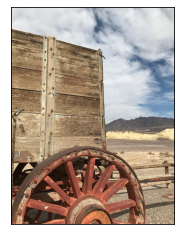

In [2]:
# Question1. 

wagon = cv2.imread("wagon.jpg")
wagon_rgb = cv2.cvtColor(wagon, cv2.COLOR_BGR2RGB)
plt.imshow(wagon_rgb)
plt.xticks([]), plt.yticks([])
plt.show()
# cv2.imshow("wagon",wagon_rgb)
# cv2.waitKey(0)
# cv2.destroyWindows()


In [3]:
#创建特征提取器, create an extractor inclduing hessian_threshold value
surf = cv2.xfeatures2d_SURF.create(hessianThreshold = 500)


#计算特征compute its SURF features, kps = keypoints
kps, des =cv2.xfeatures2d_SURF.detectAndCompute(surf, wagon_rgb, None )

print(len(kps))
print(len(des))

5088
5088


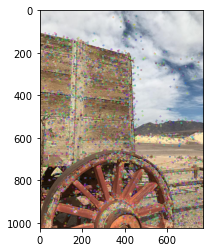

In [4]:

# Display the image with fewer keypoints
surf_wagon = cv2.drawKeypoints(wagon_rgb,kps,np.array([]))

# cv2.imshow('surf_wagon',surf_wagon)
# cv2.waitKey(0)
# cv2.destroyWindows()
plt.imshow(surf_wagon)
plt.show()

In [5]:
# wagon = cv2.imread("wagon.jpg",0)
# row,col = wagon.shape
# print(row)
# print(col)


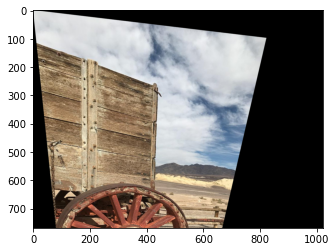

In [6]:
#Qestion2
pts_i = np.float32([[0,0],[0,512],[390,520],[390,0]])
pts_o = np.float32([[0,0],[50,475],[390,520],[420,50]])
#get transform matrix
M= cv2.getPerspectiveTransform(pts_i, pts_o)
# apply transformation
dst = cv2.warpPerspective(wagon_rgb, M,(1024,768) )

plt.imshow(dst)

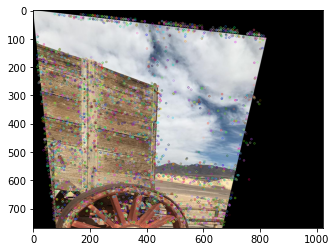

In [16]:
# compute surf feature on transformed image
kps_dst, des_dst =cv2.xfeatures2d_SURF.detectAndCompute(surf, dst, None )
# show the keypoint on the transformed image
surf_wagon_dst= cv2.drawKeypoints(dst,kps_dst,np.array([]))

plt.imshow(surf_wagon_dst)

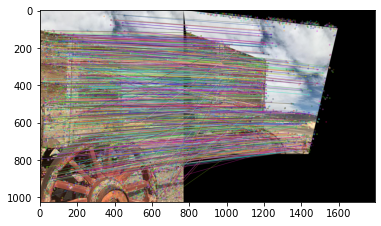

In [18]:
# Draw match
bf = cv2.BFMatcher()
matches = bf.knnMatch(des, des_dst, k=2)
good=[]
for m,n in matches:
    if m.distance < 0.8*n.distance:
        good.append([m])

result= cv2.drawMatchesKnn(surf_wagon, kps, surf_wagon_dst, kps_dst, good, None, flags=2)
plt.imshow(result)

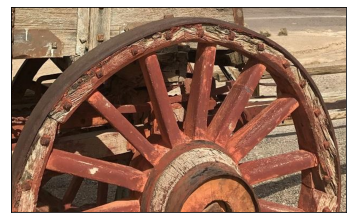

In [19]:
#Question3, 

wheel = cv2.imread("wheel.png")
wheel_rgb = cv2.cvtColor(wheel, cv2.COLOR_BGR2RGB)
plt.imshow(wheel_rgb),plt.xticks([]), plt.yticks([])
plt.show()


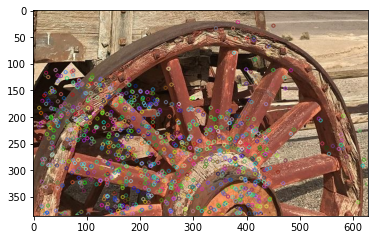

In [20]:
surf1 = cv2.xfeatures2d_SURF.create(hessianThreshold = 400)
kps_w, des_w =cv2.xfeatures2d_SURF.detectAndCompute(surf1, wheel, None )

surf_wheel = cv2.drawKeypoints(wheel_rgb,kps,np.array([]))

plt.imshow(surf_wheel)

In [21]:
print(len(kps_w))
print(len(des_w))

1896
1896


In [ ]:
# Draw match
bf = cv2.BFMatcher()
matches = bf.knnMatch(des, des_w, k=2)

good_wheel=[]
for m,n in matches:
    if m.distance < 0.01 * n.distance:
        good_wheel.append([m])

result_w = cv2.drawMatchesKnn(surf_wagon, kps, surf_wheel, kps_w, good, None, flags=2)
plt.imshow(result_w)

In [1]:
print(len(good_wheel))

NameError: name 'good_wheel' is not defined